In [46]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from datetime import datetime
import re


#Data Analysis: Better data from Nasa Website about the top 50 solar flares vs Data from SpaceWeatherLive.com
#Part 1 Data scraping and preparation
#Step 1 Scrape from SpaceWeatherLive.com
# scrape data for the top 50 solar flares shown in SpaceWeatherLive.com.
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
root = BeautifulSoup( r.content,'lxml' )


#Extract the data and set reasonable Coloumn Names for the data
tab=root.find_all("table")[0]
df1 = pd.read_html(str(tab))[0]
df1.columns=['rank','x_class','date','region','start_time','max_time','end_time','movie']
print ("After Step 1:-")
print (df1)

#Step 2 Tidying up the data
#2.1 Last column dropped
df1.pop('movie')


#2.2 combining the date and each of the three time columns into three datetime columns. 
df1['start_datetime']=pd.to_datetime(df1['date'] + ' ' + df1['start_time'])
df1['max_datetime']=pd.to_datetime(df1['date'] + ' ' + df1['max_time'])
df1['end_datetime']=pd.to_datetime(df1['date'] + ' ' + df1['end_time'])
df1.pop('start_time')
df1.pop('max_time')
df1.pop('end_time')
df1.pop('date')


##2.3 Missing regions coded as (NaN)
df1.replace('N/A',np.NaN)

df1 = df1[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime','region']]

print ("\n\nSpaceWeatherLive Data top 50 :-")
df1



After Step 1:-
    rank x_class        date  region start_time max_time end_time  \
0      1   X28.0  2003/11/04     486      19:29    19:53    20:06   
1      2   X20.0  2001/04/02    9393      21:32    21:51    22:03   
2      3   X17.2  2003/10/28     486      09:51    11:10    11:24   
3      4   X17.0  2005/09/07     808      17:17    17:40    18:03   
4      5   X14.4  2001/04/15    9415      13:19    13:50    13:55   
5      6   X10.0  2003/10/29     486      20:37    20:49    21:01   
6      7    X9.4  1997/11/06    8100      11:49    11:55    12:01   
7      8    X9.3  2017/09/06    2673      11:53    12:02    12:10   
8      9    X9.0  2006/12/05     930      10:18    10:35    10:45   
9     10    X8.3  2003/11/02     486      17:03    17:25    17:39   
10    11    X8.2  2017/09/10    2673      15:35    16:06    16:31   
11    12    X7.1  2005/01/20     720      06:36    07:01    07:26   
12    13    X6.9  2011/08/09    1263      07:48    08:05    08:08   
13    14    X6.5  2

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from datetime import datetime
import re

###################################################################******************###########################
##Step 3 Scrape the NASA data to get additional data about these solar flares.

##Function to Combine date and time columns for start, end and cme as per the arguements passed.
def Modify_datetime(dates,times,year):
    date_time=[]
    i=0
    while i<len(dates):
        if dates[i]=="Null":
            i=i+1
            date_time.append(np.NaN)
        else:
            d=dates[i].split("/")
            t=times[i].split(":")
            month=int(d[0])
            day=int(d[1])
            if int(t[0])==24:
                Hour=00
            else:
                Hour=int(t[0])
            Min=int(t[1])
            YY=int(year[i])
            dt=datetime(YY, month, day, Hour, Min)
            i=i+1
            date_time.append(dt)
    return date_time


##scraping data from Nasa website
#########################################################
nasa = requests.get("http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html")
rootn = BeautifulSoup( nasa.content )
data_nasa=rootn.text


##Task 1 and 2
##each row of data obtained as a long string element in an array "bursts"
## Making array which has each line of the text as an element
array = data_nasa.split("\n")
bursts=array[15:-4]


##Preparing final data for the Data Frame. It is the multidimensional array which is an array of arrays as element. 
##Each element array is an array of the data values
final_data=[]
arra=[]
for i in bursts:
    arra.append(i.split(" "))
for i in arra:
    i= list(filter(None, i))
    final_data.append(i[:15])
#print(final_data)


##Creating a dataframe with the data in the final data arraya and giving relevant headers from the "col" array
#########################################################
col=["start_date","start_time","end_date","end_time","start_frequency","end_frequency","flare_location","flare_region","flare_classification","cme_date","cme_time","cme_angle","cme_width","cme_speed","plot"]
dfn00=pd.DataFrame(data=final_data,columns=col)

print ("\n\nAfter Step 3:-")
print (dfn00)


##Step 4: Tidy the NASA the table
### 4.1 Recoding missing entries as NaN
dfn0=dfn00.replace('--/--',"Null")
dfn=dfn0.replace('--:--',"Null")
dfn1=dfn.replace('-----',np.NaN)
dfn2=dfn1.replace('----',np.NaN)



## 4.2 Creating a new column that indicates if a row corresponds to a halo flare or not, and Halo entries replaced as NA.
halo=[]
for i in dfn2["cme_angle"]:
    if i=="Halo":
        halo.append("True")
    else:
        halo.append("False")
dfn3=dfn2.replace('Halo',np.NaN)
dfn3['is_halo']=pd.Series(halo)


## 4.3 Creating a new column that indicates if width is given as a lower bound, and cleaning the non-numeric part of 
##the width column
width=[]
New_width=[]
for i in dfn3['cme_width']:
    if str(i)[0]==">":
        width.append("true")
        str_width=str(i)
        New_width.append(str_width[1:])
    else:
        width.append("false")
        str_width=str(i)
        New_width.append(str_width[:3])

dfn3['width_lower_bound']=pd.Series(width)
dfn3['New_width']=pd.Series(New_width)
dfn3['cme_width']=dfn3['New_width']
dfn3.pop('New_width')


## 4.4 Combining date and time columns for start, end and cme using datetime objects
##Identifying the year of the Wind/WAVES type II bursts and CMEs
year=[]
for i in dfn3['start_date']:
    year.append(pd.to_datetime(i).year)

## Working on Start Time
dfn3['start_datetime']=pd.to_datetime(dfn3['start_date'] + ' ' + dfn3['start_time'])
dfn3.pop('start_date')
dfn3.pop('start_time')


##Working on End Time
dates=dfn3['end_date']
times=dfn3['end_time']
end_datetime=Modify_datetime(dates,times,year)
dfn3['end_datetime']=pd.Series(end_datetime)
dfn3.pop('end_date')
dfn3.pop('end_time')


##Working on CME Time
dates=dfn3['cme_date']
times=dfn3['cme_time']
cme_datetime=Modify_datetime(dates,times,year)
dfn3['cme_datetime']=pd.Series(cme_datetime)
dfn3.pop('cme_date')
dfn3.pop('cme_time')


print ("\n\nAfter Step 4:-")
dfn3





After Step 3:-
     start_date start_time end_date end_time start_frequency end_frequency  \
0    1997/04/01      14:00    04/01    14:15            8000          4000   
1    1997/04/07      14:30    04/07    17:30           11000          1000   
2    1997/05/12      05:15    05/14    16:00           12000            80   
3    1997/05/21      20:20    05/21    22:00            5000           500   
4    1997/09/23      21:53    09/23    22:16            6000          2000   
5    1997/11/03      05:15    11/03    12:00           14000           250   
6    1997/11/03      10:30    11/03    11:30           14000          5000   
7    1997/11/04      06:00    11/05    04:30           14000           100   
8    1997/11/06      12:20    11/07    08:30           14000           100   
9    1997/11/27      13:30    11/27    14:00           14000          7000   
10   1997/12/12      22:45    12/12    23:20           14000          8000   
11   1998/01/25      15:03    01/25    15:18   

,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,start_datetime,end_datetime,cme_datetime
0,8000,4000,S25E16,8026,M1.3,74,79,312,PHTX,False,false,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
1,11000,1000,S28E19,8027,C6.8,NaN,360,878,PHTX,True,false,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
2,12000,80,N21W08,8038,C1.3,NaN,360,464,PHTX,True,false,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00
3,5000,500,N05W12,8040,M1.3,263,165,296,PHTX,False,false,1997-05-21 20:20:00,1997-05-21 22:00:00,1997-05-21 21:00:00
4,6000,2000,S29E25,8088,C1.4,133,155,712,PHTX,False,false,1997-09-23 21:53:00,1997-09-23 22:16:00,1997-09-23 22:02:00
5,14000,250,S20W13,8100,C8.6,240,109,227,PHTX,False,false,1997-11-03 05:15:00,1997-11-03 12:00:00,1997-11-03 05:28:00
6,14000,5000,S16W21,8100,M4.2,233,122,352,PHTX,False,false,1997-11-03 10:30:00,1997-11-03 11:30:00,1997-11-03 11:11:00
7,14000,100,S14W33,8100,X2.1,NaN,360,785,PHTX,True,false,1997-11-04 06:00:00,1997-11-05 04:30:00,1997-11-04 06:10:00
8,14000,100,S18W63,8100,X9.4,NaN,360,1556,PHTX,True,false,1997-11-06 12:20:00,1997-11-07 08:30:00,1997-11-06 12:10:00
9,14000,7000,N17E63,8113,X2.6,98,91,441,PHTX,False,false,1997-11-27 13:30:00,1997-11-27 14:00:00,1997-11-27 13:56:00


In [52]:
##Part 2 Analysis
##1. Replication of the top 50 solar flare data in SpaceWeatherLive.com using the Nasa data
##Yes -> Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA?
##Yes -> do you get data for the same solar flare events?

#Creating a Dataframe after filtering out only ^X series of Flare Classification Events
x_val=[]
dfX=dfn3[dfn3['flare_classification'].str.contains("X", na = False)]

##Ordering by Classification was tricky as it is an alphanumeric value. 
##Flare Classification (importance) was split and its numeric value was saved in another column and then sorted.
##Dtype of the numeric value was changed to numeric from string to enable correct ordering to avoid value error. 
##We got good data about the Solar Flare events mentioned on Solarweather and also a lot of 
##other events not mentioned in Solarweather.

for i in dfX['flare_classification']:
    x_val.append(i[1:])
dfX1=dfX.assign(Imp = x_val)
dfX1["Imp"] = pd.to_numeric(dfX1["Imp"])

dftop_50=dfX1.sort_values(by=['Imp'], ascending=False)
dftop_50.index = [x for x in range(0, len(dftop_50.values))]
dftop_50.pop("Imp")

dftop_50.rename(columns={'cme_angle': 'cpa'}, inplace=True)
dftop_50.rename(columns={'flare_classification': 'importance'}, inplace=True)

dftop_50 = dftop_50[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location','flare_region','importance','cme_datetime','cpa','cme_width','cme_speed','plot','is_halo','width_lower_bound',]]


print ("\n\nNasa Data Sorted based on Soft X-ray flare classification (^X Series) :-")
dftop_50




Nasa Data Sorted based on Soft X-ray flare classification (^X Series) :-


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,false
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,false
2,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,false
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,false
4,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,false
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,false
6,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,nan,NaN,PHTX,False,false
7,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,false
8,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,false
9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,false


In [54]:
####  2. Integration of both dataframes
##Processing Nasa Data for better comparison with Space Weather Data
##Extracting best match between NASA data and SpaceWeatherLive data. 
##the best matching entry used for comparison is the Flare Classification and the last 4 characters of the flare region 
#in the NASA data and x_class and region in Spaceweather Data

##Merges Issues Faced and handled:-
## 1. there are major differences between the classification and the x_class between both data, so Flare Classification 
##in Nasa Data is modified, re-defined. And extra 0 is added to the few entries.(eg. X28. -> X28.0)

## 2. there are major differences between the Flare region in Nasa Data and the region in Spaceweather Data, so Flare region 
##in Nasa Data is modified, re-defined -first character is dropped and the rest four characters are the region identifier.
##Same four letter identifier is used in Spaceweather website.


##A inner merge was done based on two columns mentioned above.
##Data types of the columns were matched before the join to resolve value error.
##New Rank Coloum added from the spaceweather data

importance=[]
for i in dftop_50['importance']:
    if i[-1]==".":
        importance.append(i+"0")
    else:
        importance.append(i)
dftop_50['importance']=pd.Series(importance)


region=[]
for i in dftop_50['flare_region']:
    if len(i)>4:
        region.append(i[1:])
    else:
        region.append(i)
dftop_50['region']=pd.Series(region)


dftop_50.importance = dftop_50.importance.astype(str)
dftop_50["region"] = pd.to_numeric(dftop_50["region"])

df1.x_class = df1.x_class.astype(str)
df1["region"] = pd.to_numeric(df1["region"])

##Integrating data from Nasa and Space Weather Both based on the classification and the region of the Solar Flares(Bursts) 
Integrated_df = pd.merge(dftop_50, df1,  how='inner', left_on=['importance','region'], right_on = ['x_class','region'])
Integrated_df=Integrated_df.drop(['region','x_class','start_datetime_y','max_datetime','end_datetime_y'],axis=1)

Integrated_df.rename(columns={'start_datetime_x': 'start_datetime'}, inplace=True)
Integrated_df.rename(columns={'end_datetime_x': 'end_datetime'}, inplace=True)


print ("\n\nThe integration of both Nasa and SpaceWeather Data (Best Match) :-")
Integrated_df




The integration of both Nasa and SpaceWeather Data (Best Match) :-


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,cme_width,cme_speed,plot,is_halo,width_lower_bound,rank
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,false,1
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,false,2
2,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,false,6
3,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,false,7
4,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,nan,NaN,PHTX,False,false,9
5,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,false,10
6,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,false,12
7,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,false,13
8,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,nan,NaN,PHTX,False,false,14
9,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,X6.2,2005-09-09 19:48:00,NaN,360,2257,PHTX,True,false,15


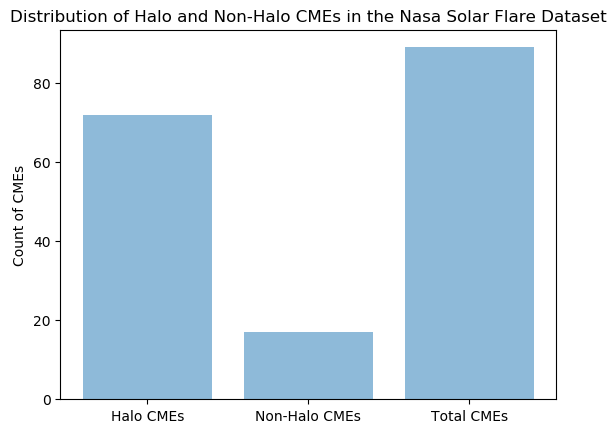

In [43]:
### 3. Analysis
###Yes flares in the top 50 tend to have Halo CMEs.A barplot comparing the number of Halo CMEs vs the Total CMEs.

##A plot that shows the top 50 solar flares in context with all data available in the NASA dataset.
##Yes -> Do flares in the top 50 tend to have Halo CMEs? 
##Below is a barplot that compares the number of Halo CMEs vs the Non-Halo CMEs vs the total CMEs in the whole dataset.

import matplotlib.pyplot as plt

halodf=pd.DataFrame(dftop_50['is_halo'].value_counts())

x_axis = ('Halo CMEs', 'Non-Halo CMEs', 'Total CMEs')
Variables = np.arange(len(x_axis))
Count = halodf['is_halo']
Count_of_CMEs=[Count[0],Count[1],(Count[0]+Count[1])]
plt.bar(Variables, Count_of_CMEs, align='center', alpha=0.5)
plt.xticks(Variables, x_axis)
plt.ylabel('Count of CMEs')
plt.title('Distribution of Halo and Non-Halo CMEs in the Nasa Solar Flare Dataset')

plt.show()

